<a href="https://colab.research.google.com/github/GavinSikma/folium_project_n3ts/blob/main/GAVIN_DANAYUB_PAMUNGKAS_X_1_JAKARTA_SELATAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Tugas Project

1. import folium, pandas, geopandas, dan drive.
2. load data shapefile, pilih kota/kabupaten yang akan dianalisis
3. load data csv dan proses merge/join data
4. load peta choropleth

In [1]:
# Import Library

import folium
import pandas as pd
import geopandas as gpd
from google.colab import drive

Pilih nama kota / kabupaten kalian. jika tidak muncul pastikan namanya sesuai dengan nama di link berikut :
https://geoservices.big.go.id/portal/apps/webappviewer/index.html?id=cb58db080712468cb4bfd408dbde3d70

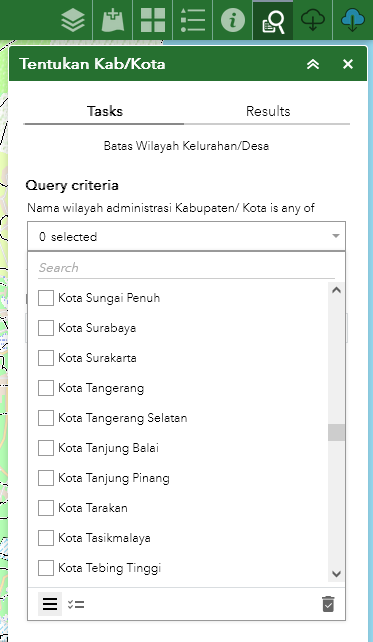

In [2]:
# Read Data Shapefile

drive.mount('/content/drive')

# Shapefile Admin Indonesia (tidak usah diubah2) Warning! File besar 1.4gb
indonesia_admin = gpd.read_file('/content/drive/MyDrive/ADMIN_INDO/ADMINISTRASI_AR_DESAKEL_10K.shp')

# Pilih Kota/Kabupaten yang ingin ditampilkan, contoh 'Kota Tangerang Selatan'
aoi_admin = indonesia_admin[indonesia_admin['WADMKK'] == 'Kota Adm. Jakarta Selatan']

Mounted at /content/drive


In [7]:
# CSV file path
csv_path = '/content/Penduduk_Jaksel.csv'

# Read shapefile
admin_gdf = aoi_admin

# Read CSV data
csv_data = pd.read_csv(csv_path, delimiter= ';')

print(csv_data.head())
print(admin_gdf.head())
# Convert column names to lowercase
csv_data['Kecamatan'] = csv_data['Kecamatan'].str.lower().str.replace(' ', '')
admin_gdf['WADMKC'] = admin_gdf['WADMKC'].str.lower().str.replace(' ', '')
#csv_data['Jumlah_KK'] = csv_data['Jumlah_KK'].astype(str).str.replace('.', '')
#csv_data['Jumlah_KK'] = pd.to_numeric(csv_data['Jumlah_KK'])

# Fix typo to merge properly
#admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.replace('pondokjagungt', 'pondokjagung')
#csv_data['Kelurahan'] = csv_data['Kelurahan'].str.replace('perigibaru', 'parigibaru')

# Merge data
merged_data = pd.merge(admin_gdf, csv_data, left_on='WADMKC', right_on='Kecamatan', how='left')

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_data, geometry=merged_data.geometry)

print(merged_gdf.head())
# Now you can use merged_gdf for further analysis and visualization

        Kecamatan  Jumlah Kepala Keluarga  Unnamed: 2  Unnamed: 3
0       Jagakarsa                369212.0         NaN         NaN
1    Pasar Minggu                334004.0         NaN         NaN
2        Cilandak                227556.0         NaN         NaN
3    Pesanggrahan                267309.0         NaN         NaN
4  Kebayoran Lama                156300.0         NaN         NaN
       OBJECTID      NAMOBJ       FCODE  \
19987   19988.0      Bangka  BA03070040   
19992   19993.0     Bintaro  BA03070040   
19993   19994.0  Bukit Duri  BA03070040   
20006   20007.0    Ciganjur  BA03070040   
20009   20010.0      Cikoko  BA03070040   

                                                  REMARK  \
19987  Hasil Delineasi Dan Kesepakatan Dengan Lurah T...   
19992  Hasil Delineasi Dan Kesepakatan Dengan Lurah T...   
19993  Hasil Delineasi Dan Kesepakatan Dengan Lurah T...   
20006  Hasil Delineasi Dan Kesepakatan Dengan Lurah T...   
20009  Hasil Delineasi Dan Kesepakatan Dengan

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [8]:
# Create a base map
m = folium.Map(location=[-6.262514956610925, 106.82078395826436], zoom_start=11)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kecamatan", "Jumlah Kepala Keluarga"],
    key_on= "feature.properties.WADMKC",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah KK"
).add_to(m)

jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah_KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKC','Jumlah Kepala Keluarga'],
        aliases=['Kecamatan','Jumlah KK']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

In [9]:
# Create a base map
m = folium.Map(location=[-6.294820544828067, 106.71208904991985], zoom_start=13)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name="Penduduk_Jaksel",
    data=merged_gdf,
    columns=["Kecamatan", "Jumlah Kepala Keluarga"],
    key_on= "feature.properties.WADMKC",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah KK"
).add_to(m)

# Create/import data sma
data_sma = pd.read_csv('SMAN Jakarta Selatan- SMAN Jakarta Selatan.csv')

data_sma['geometry'] = gpd.GeoSeries.from_wkt(data_sma['WKT'])

# Extract latitude and longitude from Point geometries
data_sma['latitude'] = data_sma['geometry'].apply(lambda x: x.y)
data_sma['longitude'] = data_sma['geometry'].apply(lambda x: x.x)

# Add markers to the map
# Create a marker layer
marker_layer = folium.FeatureGroup(name="SMAN Jaksel")

# Add markers to the layer
for i in range(0, len(data_sma)):
    folium.Marker([data_sma.iloc[i]['latitude'], data_sma.iloc[i]['longitude']], popup=data_sma.iloc[i]['nama']).add_to(marker_layer)

m.add_child(marker_layer)

# Add Jumlah_KK layer map
jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah_KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKC','Jumlah Kepala Keluarga'],
        aliases=['Kecamatan','Jumlah KK']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

Analysis Question:
Kecamatan mana yang memiliki penduduk dengan kelas tertinggi (Merah Tua)?

Jawab: jagakarsa, pasar minggu,  kebayoran baru

Kecamatan apa saja yang tidak terdapat Sekolah Negeri?

Jawab: jagakarsa, cilandak, setia budi